# 🧩 Resolución de Sistemas de Ecuaciones Diferenciales Lineales Homogéneos

## 🎯 Objetivo

Aprender y aplicar el método de **Autovalores y Autovectores** para obtener la solución general $\mathbf{X}(t)$ de un sistema de Ecuaciones Diferenciales Lineales Homogéneas (EDLH) de primer orden.

## 📝 Forma General

Un sistema lineal homogéneo se escribe en forma matricial como:
$$
\mathbf{\mathbf{X}' = \mathbf{A} \mathbf{X}}
$$
Donde:
* $\mathbf{X}(t)$ es el vector de variables dependientes (ej. $\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$)
* $\mathbf{A}$ es la matriz de coeficientes constantes.

## 💡 El Método de Solución

La solución se construye asumiendo la forma $\mathbf{X} = \mathbf{v}e^{\lambda t}$, donde $\lambda$ es un **autovalor** y $\mathbf{v}$ es su **autovector** asociado.

La solución general es una combinación lineal de las soluciones encontradas:
$$
\mathbf{X}(t) = C_1 \mathbf{v}_1 e^{\lambda_1 t} + C_2 \mathbf{v}_2 e^{\lambda_2 t} + \dots
$$

---

## Ejemplo Fácil

Resolveremos el sistema que modela un acoplamiento simple:
$$
\begin{cases} \mathbf{x'_1 = -2x_1 + x_2} \\ \mathbf{x'_2 = x_1 - 2x_2} \end{cases}
$$
La Matriz de Coeficientes es:
$$
\mathbf{A} = \begin{pmatrix} -2 & 1 \\ 1 & -2 \end{pmatrix}
$$

In [1]:
# Importación de librerías necesarias
import sympy as sp
from sympy import Function, dsolve, Eq, Derivative, symbols, Matrix, exp

# Definición de la variable independiente (t) y los símbolos de las constantes (C1, C2)
t = symbols('t')
C1, C2 = symbols('C1 C2')

# Definición de las funciones desconocidas y la matriz A
x1 = Function('x1')(t)
x2 = Function('x2')(t)
X = Matrix([[x1], [x2]])
A = Matrix([[-2, 1], [1, -2]])

print("Matriz A definida:")
print(A)

Matriz A definida:
Matrix([[-2, 1], [1, -2]])


## Paso 1: Encontrar los Autovalores ($\lambda$)

Los autovalores se encuentran resolviendo la **Ecuación Característica**:
$$
\det(\mathbf{A} - \lambda\mathbf{I}) = 0
$$
Donde $\mathbf{I}$ es la matriz identidad. Para nuestra matriz $\mathbf{A}$:
$$
\begin{vmatrix} -2-\lambda & 1 \\ 1 & -2-\lambda \end{vmatrix} = 0
$$
$$
(-2-\lambda)(-2-\lambda) - (1)(1) = 0 \quad \rightarrow \quad (\lambda+2)^2 - 1 = 0
$$
Resolviendo el polinomio característico:
$$
\lambda^2 + 4\lambda + 4 - 1 = 0 \quad \rightarrow \quad \mathbf{\lambda^2 + 4\lambda + 3 = 0}
$$

In [2]:
# Definición del símbolo para el autovalor 'lambda'
lam = symbols('lambda')

# Ecuación Característica
ec_caracteristica = Eq(lam**2 + 4*lam + 3, 0)

# Resolver para los autovalores
autovalores = sp.solve(ec_caracteristica, lam)

lambda1 = autovalores[0]
lambda2 = autovalores[1]

print(f"Ecuación Característica: {ec_caracteristica}")
print(f"Autovalor 1 (λ₁): {lambda1}")
print(f"Autovalor 2 (λ₂): {lambda2}")

Ecuación Característica: Eq(lambda**2 + 4*lambda + 3, 0)
Autovalor 1 (λ₁): -3
Autovalor 2 (λ₂): -1


## Paso 2: Encontrar los Autovectores ($\mathbf{v}$)

Para cada autovalor, resolvemos el sistema homogéneo:
$$
(\mathbf{A} - \lambda\mathbf{I})\mathbf{v} = \mathbf{0}
$$

### A. Autovector $\mathbf{v}_1$ para $\mathbf{\lambda_1 = -1}$

Sustituimos $\lambda = -1$ en $(\mathbf{A} - \lambda\mathbf{I})\mathbf{v} = \mathbf{0}$:
$$
\begin{pmatrix} -2-(-1) & 1 \\ 1 & -2-(-1) \end{pmatrix} \begin{pmatrix} v_{1,1} \\ v_{1,2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} \quad \rightarrow \quad \begin{pmatrix} -1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} v_{1,1} \\ v_{1,2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$
Esto resulta en la ecuación: $v_{1,1} - v_{1,2} = 0$, o $v_{1,1} = v_{1,2}$.
Tomando $v_{1,2} = 1$, el autovector es:
$$
\mathbf{v}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

### B. Autovector $\mathbf{v}_2$ para $\mathbf{\lambda_2 = -3}$

Sustituimos $\lambda = -3$:
$$
\begin{pmatrix} -2-(-3) & 1 \\ 1 & -2-(-3) \end{pmatrix} \begin{pmatrix} v_{2,1} \\ v_{2,2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} \quad \rightarrow \quad \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} v_{2,1} \\ v_{2,2} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$
Esto resulta en la ecuación: $v_{2,1} + v_{2,2} = 0$, o $v_{2,1} = -v_{2,2}$.
Tomando $v_{2,2} = 1$, el autovector es:
$$
\mathbf{v}_2 = \begin{pmatrix} -1 \\ 1 \end{pmatrix}
$$

In [3]:
# --- Construcción de la Solución General ---

# Solución 1: X₁ = v₁ * e^(λ₁t)
v1 = Matrix([[1], [1]])
X1 = v1 * exp(lambda1 * t)

# Solución 2: X₂ = v₂ * e^(λ₂t)
v2 = Matrix([[-1], [1]])
X2 = v2 * exp(lambda2 * t)

# Solución General: X(t) = C₁*X₁ + C₂*X₂
X_solucion_general = C1 * X1 + C2 * X2

print("--- Solución Final ---")
print(f"La solución general del sistema X(t) es:")
print(X_solucion_general)

# Extrayendo las componentes
x1_sol = X_solucion_general[0]
x2_sol = X_solucion_general[1]

print("\nComponente x₁(t):")
print(x1_sol)
print("\nComponente x₂(t):")
print(x2_sol)

--- Solución Final ---
La solución general del sistema X(t) es:
Matrix([[C1*exp(-3*t) - C2*exp(-t)], [C1*exp(-3*t) + C2*exp(-t)]])

Componente x₁(t):
C1*exp(-3*t) - C2*exp(-t)

Componente x₂(t):
C1*exp(-3*t) + C2*exp(-t)


## 🌟 Conclusión

La solución general del sistema:
$$
\mathbf{X}' = \begin{pmatrix} -2 & 1 \\ 1 & -2 \end{pmatrix} \mathbf{X}
$$
es:
$$
\mathbf{x_1(t) = C_1 e^{-t} - C_2 e^{-3t}}
$$
$$
\mathbf{x_2(t) = C_1 e^{-t} + C_2 e^{-3t}}
$$

Como ambos autovalores ($\lambda_1=-1$ y $\lambda_2=-3$) son **reales y negativos**, el sistema es un **Nodo Estable**. Esto significa que a medida que $t \to \infty$, tanto $x_1(t)$ como $x_2(t)$ tienden a cero, lo que representa un sistema físico que siempre regresa al estado de equilibrio.

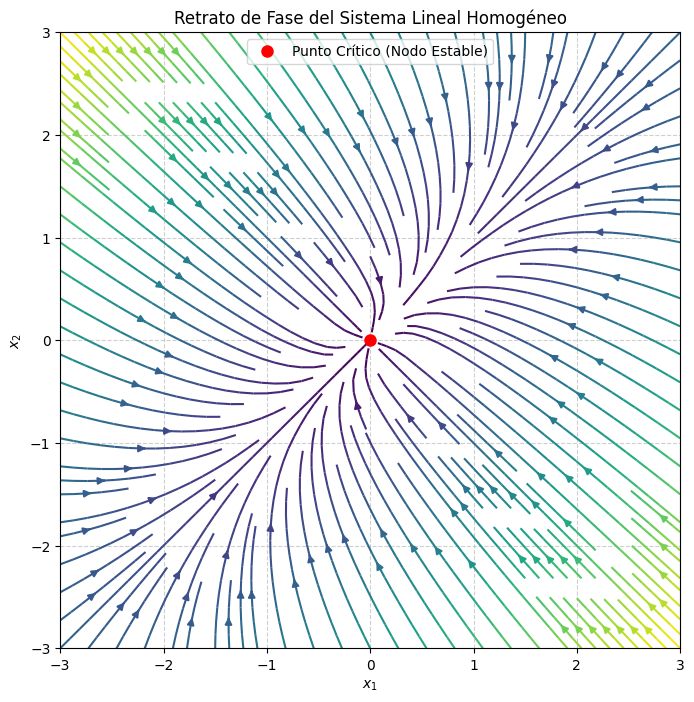

In [4]:
# Importación de librerías para la visualización
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definición del Rango y la Malla ---
rango = 3.0
x_limit = np.linspace(-rango, rango, 20)
y_limit = np.linspace(-rango, rango, 20)
X_grid, Y_grid = np.meshgrid(x_limit, y_limit)

# --- 2. Definición de las EDO del Sistema (Campos Vectoriales) ---
# El sistema es: x1' = -2*x1 + x2  (U)
#                x2' = x1 - 2*x2   (V)
U = -2 * X_grid + Y_grid
V = X_grid - 2 * Y_grid

# --- 3. Normalización y Gráfico ---
# Calculamos la magnitud (N) para controlar el tamaño de las flechas
N = np.sqrt(U**2 + V**2)
U_norm = U / N
V_norm = V / N

plt.figure(figsize=(8, 8))
# Dibuja el flujo, el color depende de la magnitud (velocidad)
plt.streamplot(X_grid, Y_grid, U_norm, V_norm, density=1.5, linewidth=1.5, color=N, cmap='viridis')

# Dibuja el punto crítico (0, 0)
plt.plot(0, 0, 'ro', markersize=8, label='Punto Crítico (Nodo Estable)')

# Títulos y Etiquetas
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Retrato de Fase del Sistema Lineal Homogéneo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## 🌟 Conclusión Analítica y Visual

El análisis es completo al unir la solución analítica con la interpretación cualitativa:

1.  **Autovalores Reales y Negativos** ($\lambda_1=-1$ y $\lambda_2=-3$) $\rightarrow$ **Nodo Estable**.
2.  **Retrato de Fase:** La gráfica muestra que **todas las trayectorias** (curvas) se dirigen hacia el origen (0, 0) a medida que el tiempo ($t$) avanza.

Este resultado confirma que el sistema es **asintóticamente estable**; cualquier perturbación decae, y el sistema regresa a su estado de reposo a largo plazo.